In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import r2_score
import joblib

In [2]:
df=pd.read_csv("../Data/HouseImformation.csv")

In [3]:
df.head(6)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33


In [4]:
df["Area"]=df["Area"].str.replace(',','').astype(float)

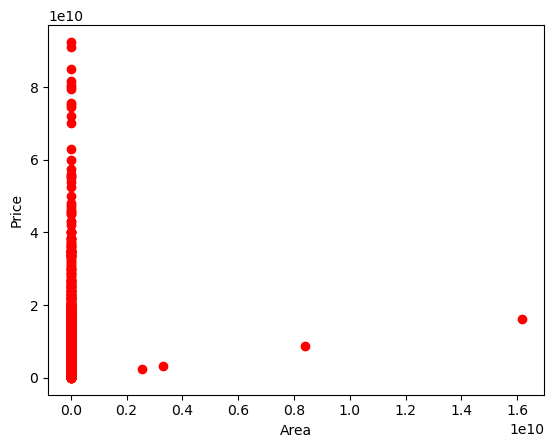

In [6]:
plt.scatter(df["Area"],df["Price"],color='red')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [8]:
iso=IsolationForest(contamination=0.01)
df["Outer"]=iso.fit_predict(df[["Area","Price"]])

In [9]:
print(df['Outer'].value_counts())

Outer
 1    3444
-1      35
Name: count, dtype: int64


In [12]:
df=df.drop(index=df[df["Outer"] == -1].index)
df=df.dropna()

In [14]:
MeanPriceAddressOuter=df.groupby("Address")["Price"].mean()
df["MeanPriceA"] = df["Address"].map(MeanPriceAddressOuter)

In [15]:
mask=np.random.rand(len(df)) < 0.8
train=df[mask]
test=df[~mask]


x_train=np.asanyarray(train[['Area','Room','Parking','Warehouse','Elevator','MeanPriceA']])
y_train=np.asanyarray(train[['Price']])

x_test=np.asanyarray(test[['Area','Room','Parking','Warehouse','Elevator','MeanPriceA']])
y_test=np.asanyarray(test[['Price']])

In [16]:
poly2=PolynomialFeatures(degree=2)
poly3=PolynomialFeatures(degree=3)
poly4=PolynomialFeatures(degree=4)


x_train_poly2=poly2.fit_transform(x_train)
x_train_poly3=poly3.fit_transform(x_train)
x_train_poly4=poly4.fit_transform(x_train)



regr_poly2=linear_model.LinearRegression()
regr_poly3=linear_model.LinearRegression()
regr_poly4=linear_model.LinearRegression()

regr_poly2.fit(x_train_poly2,y_train)
regr_poly3.fit(x_train_poly3,y_train)
regr_poly4.fit(x_train_poly4,y_train)

print ('Coefficients Poly 2: ', regr_poly2.coef_)
print ('Coefficients Poly 3: ', regr_poly3.coef_)
print ('Coefficients Poly 4: ', regr_poly4.coef_)

Coefficients Poly 2:  [[ 3.93650711e-09  3.27789843e-08  2.26954538e-12  1.16756296e-11
  -1.79722576e-11  2.13827667e-11  7.33652238e-02  3.50948560e-08
   1.01934517e-10  9.60042489e-10 -1.48797853e-09  2.35061730e-09
   7.05111442e-03 -4.16064963e-12  1.94021684e-11 -3.18917820e-11
   4.42371756e-11  3.47348479e-02  1.16756250e-11 -7.54922142e-14
   2.46168425e-11  8.76259887e-02 -1.79721996e-11  8.49899164e-12
  -5.34530390e-02  2.13827560e-11  1.86856763e-01 -3.53699300e-11]]
Coefficients Poly 3:  [[-6.13323579e-18 -7.65329325e-10 -1.02155182e-13  5.53917963e-12
   3.59494462e-11  2.11065623e-11  5.46453427e-10  1.55614655e-10
   6.72702038e-10  2.49200115e-09 -1.20513338e-09 -4.08496420e-08
   8.88851888e-08 -7.04026510e-21 -1.33959596e-21 -2.03467551e-21
  -4.11705138e-22 -4.49485775e-12  7.76418466e-22  8.56963089e-22
   1.54057359e-21  2.38263181e-12  2.96514002e-22  1.45994480e-21
   1.60423570e-12  1.33721340e-21  3.82957785e-12  8.16758642e-11
   4.29872626e-16  4.13540160e

In [17]:
x_test_poly2=poly2.fit_transform(x_test)
x_test_poly3=poly3.fit_transform(x_test)
x_test_poly4=poly4.fit_transform(x_test)


y_predict_Poly2=regr_poly2.predict(x_test_poly2)
y_predict_Poly3=regr_poly3.predict(x_test_poly3)
y_predict_Poly4=regr_poly4.predict(x_test_poly4)

#print(regPoly.coef_)
print("R2-score Poly 2: %.2f" % r2_score(y_test,y_predict_Poly2))
print("R2-score Poly 3: %.2f" % r2_score(y_test,y_predict_Poly3))
print("R2-score Poly 4: %.2f" % r2_score(y_test,y_predict_Poly4))

R2-score Poly 2: 0.80
R2-score Poly 3: 0.74
R2-score Poly 4: 0.69


In [18]:
joblib.dump(regr_poly2, '../Models/PolynomialFeatureDgree2Model.pkl')
joblib.dump(regr_poly3, '../Models/PolynomialFeatureDgree3Model.pkl')
joblib.dump(regr_poly4, '../Models/PolynomialFeatureDgree4Model.pkl')

['../Models/PolynomialFeatureDgree4Model.pkl']

In [22]:
df_raw=df=pd.read_csv("../Data/HouseImformation.csv")

In [23]:
df_raw["Area"]=df_raw["Area"].str.replace(',','').astype(float)

In [32]:
isoOuter=IsolationForest(contamination=0.001)
df_raw['OuterData']=isoOuter.fit_predict(df_raw[["Area", "Price"]])

df_raw=df_raw.dropna()

C:\Users\Abolfazl\AppData\Local\Temp\ipykernel_14408\1159539982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['OuterData']=isoOuter.fit_predict(df_raw[["Area", "Price"]])


In [33]:
MeanPriceAddressOuter=df_raw.groupby("Address")["Price"].mean()
df_raw["MeanPriceA"] = df_raw["Address"].map(MeanPriceAddressOuter)

In [35]:
mask=np.random.rand(len(df_raw)) < 0.8
train=df_raw[mask]
test=df_raw[~mask]


x_train=np.asanyarray(train[['Area','Room','Parking','Warehouse','Elevator','MeanPriceA']])
y_train=np.asanyarray(train[['Price']])

x_test=np.asanyarray(test[['Area','Room','Parking','Warehouse','Elevator','MeanPriceA']])
y_test=np.asanyarray(test[['Price']])

In [36]:
poly2=PolynomialFeatures(degree=2)

x_train_poly2=poly2.fit_transform(x_train)

regr_poly2=linear_model.LinearRegression()

regr_poly2.fit(x_train_poly2,y_train)

print ('Coefficients Poly 2: ', regr_poly2.coef_)


x_test_poly2=poly2.fit_transform(x_test)

y_predict_Poly2=regr_poly2.predict(x_test_poly2)

print("R2-score Poly 2: %.2f" % r2_score(y_test,y_predict_Poly2))

Coefficients Poly 2:  [[ 8.45744151e-07  1.59404005e+00  9.32299748e-06 -5.58671286e-06
  -4.08602159e-10 -1.13839330e-09  3.35550763e-01  4.10874342e-10
  -3.38801512e+00  1.59406293e+00  1.59406293e+00  1.59406287e+00
  -2.80195594e-10  7.65803169e-09  1.16873643e-09  1.37313944e-09
   1.88791871e-10  5.32279711e-01 -6.07649332e-10 -7.84572370e-10
  -1.32791289e-09 -1.63665129e-02 -4.08602577e-10 -1.35684497e-09
  -2.50450409e-01 -1.13839481e-09 -5.99825865e-02 -2.77622746e-11]]
R2-score Poly 2: 0.73


In [37]:
joblib.dump(regr_poly2, '../Models/PolynomialFeatureDgree2RawDataModel.pkl')

['../Models/PolynomialFeatureDgree2RawDataModel.pkl']